In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib as mpt

In [19]:
# 加载数据
data = pd.read_csv('../datas/boston_housing.data', sep='\s+', header=None)

In [20]:
# 获取特征属性X和目标属性Y
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [21]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [22]:
# 特征工程
'''
PolynomialFeatures ####多项式扩展
degree=2,扩展的阶数
interaction_only=False,是否只保留交互项
include_bias=True，是否需要偏置项
'''

print(x_train.shape)
print(x_test.shape)
print(x_test.iloc[0, :])
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# poly.fit(x_train)
# x_train_poly = poly.transform(x_train)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
print(x_train_poly.shape)
print(x_test_poly.shape)
print(x_test_poly[0])
# sys.exit()

(354, 13)
(152, 13)
0       0.05479
1      33.00000
2       2.18000
3       0.00000
4       0.47200
5       6.61600
6      58.10000
7       3.37000
8       7.00000
9     222.00000
10     18.40000
11    393.36000
12      8.93000
Name: 305, dtype: float64
(354, 91)
(152, 91)
[5.47900000e-02 3.30000000e+01 2.18000000e+00 0.00000000e+00
 4.72000000e-01 6.61600000e+00 5.81000000e+01 3.37000000e+00
 7.00000000e+00 2.22000000e+02 1.84000000e+01 3.93360000e+02
 8.93000000e+00 1.80807000e+00 1.19442200e-01 0.00000000e+00
 2.58608800e-02 3.62490640e-01 3.18329900e+00 1.84642300e-01
 3.83530000e-01 1.21633800e+01 1.00813600e+00 2.15521944e+01
 4.89274700e-01 7.19400000e+01 0.00000000e+00 1.55760000e+01
 2.18328000e+02 1.91730000e+03 1.11210000e+02 2.31000000e+02
 7.32600000e+03 6.07200000e+02 1.29808800e+04 2.94690000e+02
 0.00000000e+00 1.02896000e+00 1.44228800e+01 1.26658000e+02
 7.34660000e+00 1.52600000e+01 4.83960000e+02 4.01120000e+01
 8.57524800e+02 1.94674000e+01 0.00000000e+00 0.0000000

In [23]:
# 构建模型
linear = LinearRegression(fit_intercept=True)
lasso = Lasso(alpha=0.001, fit_intercept=True)
ridge = Ridge(alpha=10000.0, fit_intercept=True)

In [24]:
# 模型训练
linear.fit(x_train_poly, y_train)
lasso.fit(x_train_poly, y_train)
ridge.fit(x_train_poly, y_train)

C:\MySoftware\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+03, tolerance: 2.750e+00
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=10000.0)

In [25]:
print(linear.coef_)
print(linear.intercept_)

[-2.73800310e+01 -2.83680353e-01 -3.21856522e+00  3.18045087e+01
  1.86675406e+01  1.70850642e+01  8.31096136e-01 -4.20964983e+00
  1.30748471e+00  6.33641465e-02  9.35391435e-01  1.18527374e-01
  1.71676706e+00  6.16480268e-01 -3.41658183e-01  2.04179352e+00
 -2.52103587e+00  2.30159926e-01 -7.80253021e-04 -2.63870920e-01
 -1.57400067e+00  9.56828149e-02  3.71082474e-01 -3.67451252e-04
  4.01824592e-02 -3.67040601e-04 -1.17274578e-01 -2.99749981e-01
  2.14199994e-02 -3.74688839e-04  1.19532607e-02 -1.16439987e-03
  6.68539476e-04 -1.07547048e-02  6.87889625e-04 -1.03466365e-02
 -7.07126001e-01  2.48175898e+00  3.21584577e-01 -5.03463626e-04
 -2.77232002e-02 -3.95098321e-02 -1.16544803e-03 -2.63134022e-02
  2.47166187e-03  1.91473127e-02 -2.26488940e+01 -5.11389519e+00
  6.92986845e-02  2.53543995e+00 -1.13134862e+00  7.42997024e-02
 -1.43686747e+00  4.52182019e-02 -8.94649175e-02  1.02129237e+01
 -7.68496570e-01  9.25671662e+00 -1.01781912e+00  4.50670724e-02
 -5.13265233e+00 -7.62961

In [26]:
print(lasso.coef_)
print(lasso.intercept_)

[-2.02718103e-01 -2.28197051e-01  5.54175429e-01  0.00000000e+00
 -0.00000000e+00  2.21848061e+01  1.13745096e-01  1.27247839e+00
  3.79584127e-01 -1.40390215e-02 -1.06417205e+00  6.00760028e-02
  1.06714623e+00  1.37751632e-01 -2.30050343e-03  1.93125018e+00
 -2.88349681e+00  1.86363902e-01 -6.25272038e-03 -3.45151112e-01
  2.46070386e-04  1.33233610e-03  2.20467339e-02 -3.29600052e-04
  3.73550748e-02 -1.33596996e-03  1.52080932e-02  2.16962026e-02
  2.41047489e-02 -4.66843572e-04  6.94399912e-03  1.67378152e-03
  4.35451438e-04  5.21279745e-04 -1.21320125e-04 -7.21067174e-03
 -5.35785730e-01  2.45128805e-01 -4.35268555e-02  6.47003396e-04
 -5.60655990e-02 -4.13006254e-02 -3.17693607e-06 -4.06835120e-02
  1.74323975e-03 -3.78958457e-03  0.00000000e+00 -4.03546874e+00
  8.46635078e-02  2.31459440e-01 -1.18830806e+00  3.86996085e-02
  2.62239220e-01  4.68852799e-02 -2.05720142e-01  1.22728280e+00
 -4.38909719e-01 -1.54227788e+00 -1.40323072e+00  4.20745138e-02
  2.60816246e-01 -2.58073

In [27]:
print(ridge.coef_)
print(ridge.intercept_)

[ 1.40501549e-03 -2.48299567e-03  1.04191732e-03  5.72394664e-05
  1.10394745e-04  1.99018470e-03  1.15011139e-02 -7.54708769e-04
  3.21984048e-03  2.83715578e-02 -1.62205375e-03  9.90002523e-03
  3.04726738e-03  6.96657268e-03  3.99574735e-02  3.79014128e-03
 -1.40993470e-03  2.93634933e-02 -4.34272799e-03 -2.78806137e-02
 -4.01203801e-02 -4.83473579e-04  7.59931343e-03  4.08166960e-04
  1.76572103e-02 -8.91035712e-04  9.05215094e-03 -3.01112994e-04
  5.48042956e-02 -9.79801994e-04  4.88873763e-03  3.58756502e-03
  6.03227404e-04 -3.19654147e-03 -1.15931264e-03 -3.04270739e-03
  3.96335576e-03  2.95116645e-03  3.74195550e-03  6.86125181e-03
 -3.67410488e-02 -3.89331559e-04 -5.25197666e-04 -5.34930758e-02
  1.83991157e-03  6.03230216e-04 -4.48148477e-05 -1.54416421e-03
  1.92898751e-02  5.76587022e-05 -6.36418128e-03  2.55142366e-03
 -4.33838516e-04 -3.00697289e-03  1.08085203e-03  1.10096157e-03
 -1.64500863e-03 -5.53815130e-04 -4.14042905e-03 -3.07765893e-02
 -1.21017579e-03 -1.42564

In [28]:
# 预测测试集
y_test_hat_linear = linear.predict(x_test_poly)
y_test_hat_lasso = lasso.predict(x_test_poly)
y_test_hat_ridge = ridge.predict(x_test_poly)

In [29]:
# 评估指标
print(linear.score(x_train_poly, y_train))
print(linear.score(x_test_poly, y_test))

0.9244353692055318
0.8692231017890285


In [30]:
print(lasso.score(x_train_poly, y_train))
print(lasso.score(x_test_poly, y_test))

0.9058998047800704
0.8549628170840693


In [31]:
print(ridge.score(x_train_poly, y_train))
print(ridge.score(x_test_poly, y_test))

0.86749869284638
0.8059926579175123


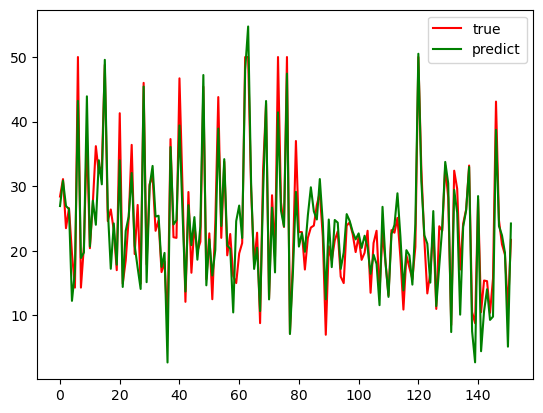

In [32]:
# 画图 linear
plt.plot(range(len(x_test)), y_test, 'r', label=u'true')
plt.plot(range(len(x_test)), y_test_hat_linear, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show()

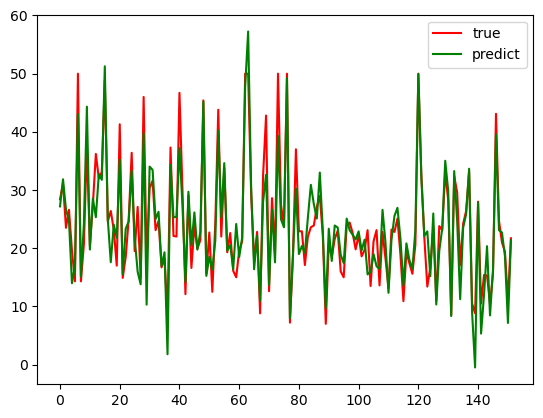

In [33]:
# 画图 lasso
plt.plot(range(len(x_test)), y_test, 'r', label=u'true')
plt.plot(range(len(x_test)), y_test_hat_lasso, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show()

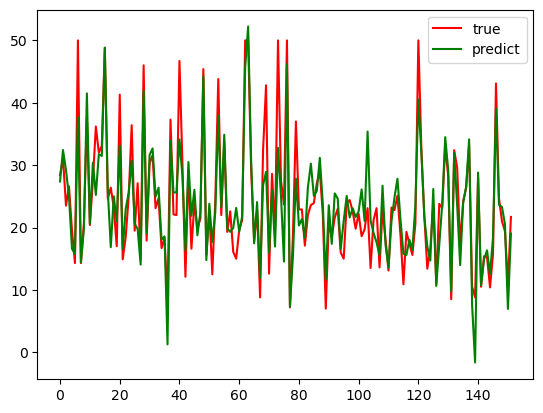

In [34]:
# 画图 ridge
plt.plot(range(len(x_test)), y_test, 'r', label=u'true')
plt.plot(range(len(x_test)), y_test_hat_ridge, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show()